In [1]:
from keras import models
from keras import layers

def build_network(hidden_layer_size, output_size=10):
    network = models.Sequential()
    network.add(layers.Dense(hidden_layer_size, activation='relu', input_shape=(28*28,)))
    network.add(layers.Dense(output_size, activation='softmax'))
    
    network.compile(optimizer='rmsprop',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    return network

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape((-1, 28*28))
    x_train = x_train.astype('float32')/255

    x_test = x_test.reshape((-1, 28*28))
    x_test = x_test.astype('float32')/255
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [4]:
network = build_network(512)
x_train, y_train, x_test, y_test = prepare_data()

In [5]:
history = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 39us/step - loss: 0.2882 - acc: 0.9164 - val_loss: 0.1631 - val_acc: 0.9552
Epoch 2/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.1187 - acc: 0.9651 - val_loss: 0.1113 - val_acc: 0.9654
Epoch 3/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.0767 - acc: 0.9775 - val_loss: 0.0887 - val_acc: 0.9728
Epoch 4/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.0553 - acc: 0.9840 - val_loss: 0.0833 - val_acc: 0.9742
Epoch 5/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.0400 - acc: 0.9880 - val_loss: 0.0816 - val_acc: 0.9757
Epoch 6/20
48000/48000 [==============================] - 2s 35us/step - loss: 0.0302 - acc: 0.9915 - val_loss: 0.0816 - val_acc: 0.9767
Epoch 7/20
48000/48000 [==============================] - 2s 39us/step - loss: 0

In [6]:
from util import plot_history

plot_history(history)

<Figure size 800x400 with 2 Axes>

In [17]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 24us/step
test acc: 0.8852


In [18]:
network = build_network(256)
history2 = network.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Train on 1000 samples, validate on 59000 samples
Epoch 1/20
1000/1000 [==============================] - 1s 722us/step - loss: 1.4972 - acc: 0.5500 - val_loss: 1.0020 - val_acc: 0.7422
Epoch 2/20
1000/1000 [==============================] - 0s 474us/step - loss: 0.7285 - acc: 0.8290 - val_loss: 0.6960 - val_acc: 0.8259
Epoch 3/20
1000/1000 [==============================] - 0s 467us/step - loss: 0.5153 - acc: 0.8820 - val_loss: 0.6032 - val_acc: 0.8362
Epoch 4/20
1000/1000 [==============================] - 0s 468us/step - loss: 0.4053 - acc: 0.9070 - val_loss: 0.5547 - val_acc: 0.8439
Epoch 5/20
1000/1000 [==============================] - 0s 464us/step - loss: 0.3378 - acc: 0.9270 - val_loss: 0.4825 - val_acc: 0.8656
Epoch 6/20
1000/1000 [==============================] - 0s 492us/step - loss: 0.2815 - acc: 0.9340 - val_loss: 0.4580 - val_acc: 0.8675
Epoch 7/20
1000/1000 [==============================] - 0s 496us/step - loss: 0.2381 - acc: 0.9490 - val_loss: 0.4373 - val_acc: 0.8728

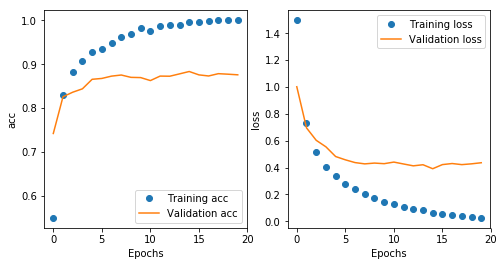

In [19]:
plot_history(history2)

In [20]:
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test acc:', test_acc)

10000/10000 [==============================] - 0s 20us/step
test acc: 0.8803


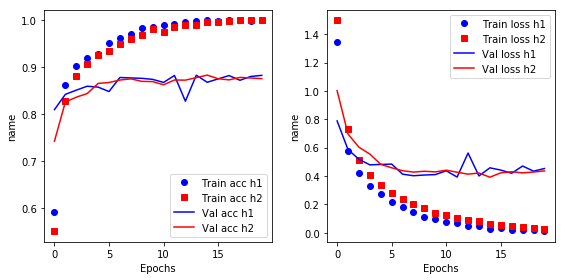

In [21]:
from util import compare_history

compare_history(history, history2)